In [16]:
import pandas as pd
import numpy as np
import json
import string
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from funcions import add_value_labels

In [17]:
with open('../Files/English_dictionary.json', 'r') as f:
    dic = json.load(f)

In [18]:
dic=list(dic.keys())

In [19]:
remove_vowels = str.maketrans('', '', 'aeiou')
letters=[i.translate(remove_vowels) for i in dic if i.translate(remove_vowels) != ""]
letters[:5]

['h', 'hd', 'hng', 'hs', 'l']

In [20]:
total = dict.fromkeys(string.ascii_lowercase, 0)

In [21]:
vowels=["a","e", "i", "o", "u"]
for i in vowels:
    del total[i]

In [22]:
total["-"]=0
total

{'b': 0,
 'c': 0,
 'd': 0,
 'f': 0,
 'g': 0,
 'h': 0,
 'j': 0,
 'k': 0,
 'l': 0,
 'm': 0,
 'n': 0,
 'p': 0,
 'q': 0,
 'r': 0,
 's': 0,
 't': 0,
 'v': 0,
 'w': 0,
 'x': 0,
 'y': 0,
 'z': 0,
 '-': 0}

In [23]:
for i in letters:
    for x in i:
        total[x]+=1

In [24]:
total

{'b': 63940,
 'c': 152979,
 'd': 113189,
 'f': 39238,
 'g': 82625,
 'h': 92370,
 'j': 5458,
 'k': 26814,
 'l': 194914,
 'm': 105203,
 'n': 251434,
 'p': 113661,
 'q': 5883,
 'r': 246143,
 's': 250281,
 't': 230894,
 'v': 33075,
 'w': 22408,
 'x': 10493,
 'y': 70578,
 'z': 14757,
 '-': 2}

In [25]:
del total["-"]

In [26]:
df = pd.DataFrame.from_dict(total, orient ='index', columns=["total"])
df.index.name = "letter"
df.reset_index(inplace=True)
df.sort_values(by=['letter'], ascending=False, inplace=True)

In [27]:
df

,letter,total
20,z,14757
19,y,70578
18,x,10493
17,w,22408
16,v,33075
15,t,230894
14,s,250281
13,r,246143
12,q,5883
11,p,113661


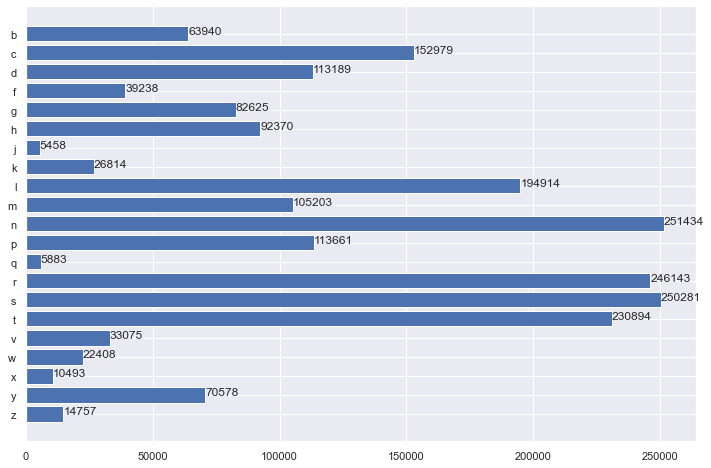

In [28]:
plt.figure(figsize=(12, 8))
plt.barh(df.letter, df.total)

for index, value in enumerate(df.total):
    plt.text(value, index, str(value))

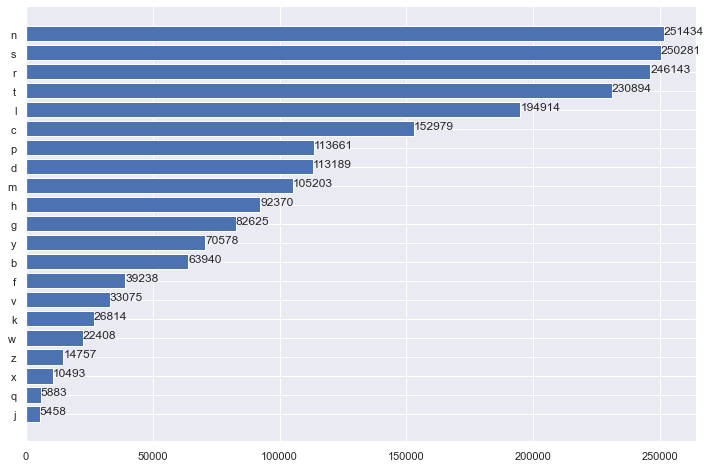

In [29]:
df.sort_values(by=['total'], ascending=True, inplace=True)
plt.figure(figsize=(12, 8))
plt.barh(df.letter, df.total)

for index, value in enumerate(df.total):
    plt.text(value, index, str(value))

In [34]:
df.sort_values(by="total", ascending=False, inplace=True)
df['per'] = (df.total * 100 / df.total.sum()).round(2).astype(str) + '%'
df.set_index("letter", inplace=True)

In [35]:
df.to_csv("../Data_files/English_allwords.csv")

In [16]:
df_per=df[["letter", "total"]]
df_per['per'] = (df_per.total * 100 / df_per.total.sum()).round(2).astype(str) + '%'
df_per.drop(columns=["total"], inplace=True)
df_per.set_index("letter")

,per
letter,
n,11.82%
s,11.77%
r,11.58%
t,10.86%
l,9.17%
c,7.19%
p,5.35%
d,5.32%
m,4.95%


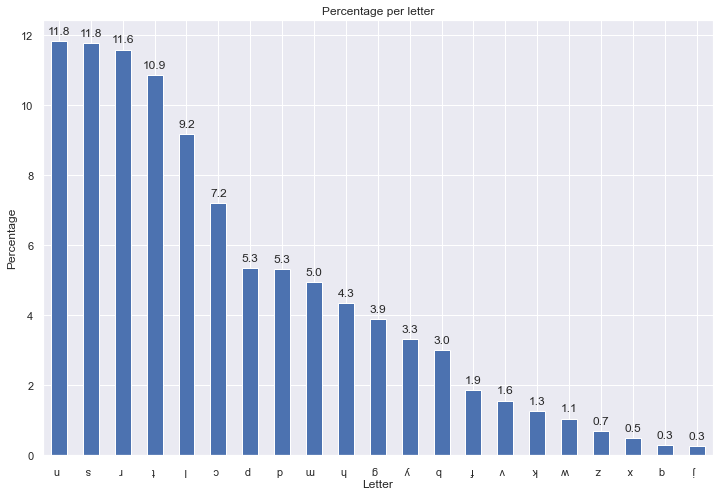

In [17]:
df_per['per'] = (df.total * 100 / df.total.sum()).round(2)

plt.figure(figsize=(12, 8))
ax=df_per.per.plot(kind='bar')


ax.set_title('Percentage per letter')
ax.set_xlabel('Letter')
ax.set_ylabel('Percentage')
ax.set_xticklabels(df_per.letter)
plt.xticks(rotation=180, ha='right')

add_value_labels(ax)

# Vowels

In [18]:
with open('../Files/words_dictionary.json', 'r') as f:
    dic = json.load(f)

In [19]:
dic=list(dic.keys())

In [20]:
list_letters=list(df.letter)

In [21]:
letters_join="".join(list_letters)
letters_join

'nsrtlcpdmhgybfvkwzxqj'

In [22]:
remove_vowels = str.maketrans('', '', letters_join)
dic_vowels=[i.translate(remove_vowels) for i in dic if i.translate(remove_vowels) != ""]
dic_vowels[:5]

['a', 'aa', 'aaa', 'aa', 'aae']

In [23]:
vowels = dict.fromkeys(string.ascii_lowercase, 0)

In [24]:
for i in list_letters:
    del vowels[i]

In [25]:
vowels["-"]=0
vowels

{'a': 0, 'e': 0, 'i': 0, 'o': 0, 'u': 0, '-': 0}

In [26]:
for i in dic_vowels:
    for x in i:
        vowels[x]+=1

In [27]:
del vowels["-"]

In [28]:
vowels

{'a': 295791, 'e': 376457, 'i': 313009, 'o': 251596, 'u': 131495}

In [29]:
df_vo = pd.DataFrame.from_dict(vowels, orient ='index', columns=["total"])
df_vo.index.name = "vowel"
df_vo.reset_index(inplace=True)
df_vo.sort_values(by=['vowel'], ascending=False, inplace=True)

In [30]:
df_vo.set_index("vowel")

,total
vowel,
u,131495
o,251596
i,313009
e,376457
a,295791


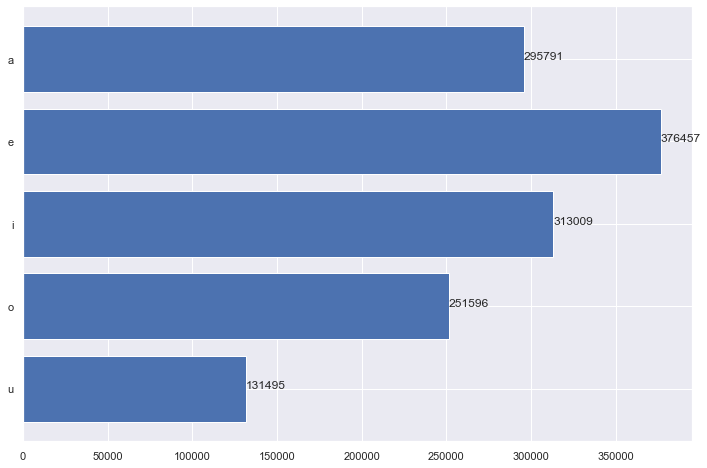

In [31]:
plt.figure(figsize=(12, 8))
plt.barh(df_vo.vowel, df_vo.total)

for index, value in enumerate(df_vo.total):
    plt.text(value, index, str(value))

In [32]:
df_vo.sort_values(by="total", ascending=False, inplace=True)
df_vo['per'] = (df_vo.total * 100 / df_vo.total.sum()).round(2).astype(str) + '%'
df_vo.set_index("vowel")

,total,per
vowel,,
e,376457,27.51%
i,313009,22.87%
a,295791,21.62%
o,251596,18.39%
u,131495,9.61%


In [33]:
df_vo_per=df_vo[["vowel", "total"]]
df_vo_per['per'] = (df_vo_per.total * 100 / df_vo_per.total.sum()).round(2).astype(str) + '%'
df_vo_per.drop(columns=["total"], inplace=True)
df_vo_per.set_index("vowel")

,per
vowel,
e,27.51%
i,22.87%
a,21.62%
o,18.39%
u,9.61%


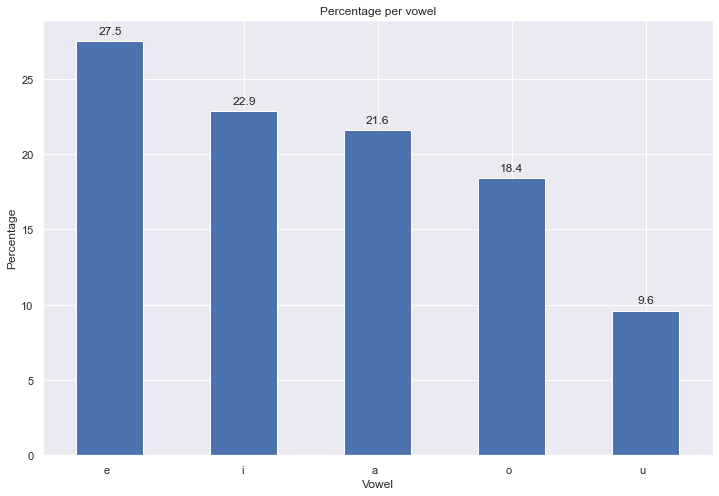

In [34]:
df_vo_per['per'] = (df_vo.total * 100 / df_vo.total.sum()).round(2)

plt.figure(figsize=(12, 8))
ax=df_vo_per.per.plot(kind='bar')


ax.set_title('Percentage per vowel')
ax.set_xlabel('Vowel')
ax.set_ylabel('Percentage')
ax.set_xticklabels(df_vo_per.vowel)
plt.xticks(rotation=0, ha='right')

add_value_labels(ax)